In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.tools.visualization import plot_histogram

ModuleNotFoundError: No module named 'qiskit'

In [2]:
# set the lenght of n bit string
n=4
# set oracle ,b for balance ,c for constant
oracle="b"
#if the oracle is  balanced  set the hidden bitstring ,b
if oracle =="b":
    b=14#np.random.randinit(q,2**n) 
#if the oracle is constant set c=0 or 1 randomly
if oracle=="c":
    c=np.random.randint(2)

In [3]:
#Create register
#n qbit for querying oracle and one for storing the answer
qr=QuantumRegister(n+1)
cr=ClassicalRegister(n)

djCircuit=QuantumCircuit(qr,cr)
barriers=True

djCircuit.x(qr[n])

if barriers:
    djCircuit.barrier()
    
#hadamard to all
djCircuit.h(qr)

djCircuit.barrier()
#Oracle
if oracle=="c":
    if c==1:
        djCircuit.x(qr[n])
    else:
        djCircuit.iden(qr[n])
else:
    for i in range(n):
        if(b&(1<<i)):
            djCircuit.cx(qr[i],qr[n])
if barriers:
    djCircuit.barrier()
        
for i in range(n):
    djCircuit.h(qr[i])

for i in range(n):
    djCircuit.measure(qr[i],cr[i])

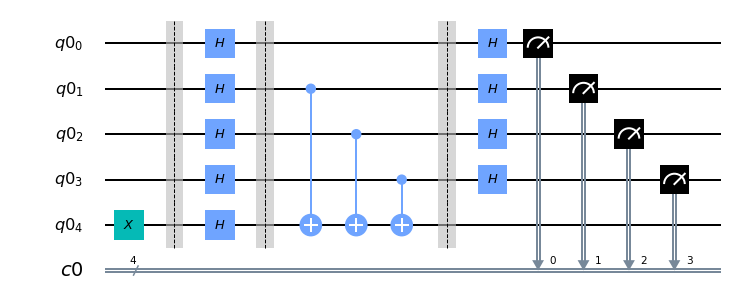

In [4]:
djCircuit.draw(output='mpl')

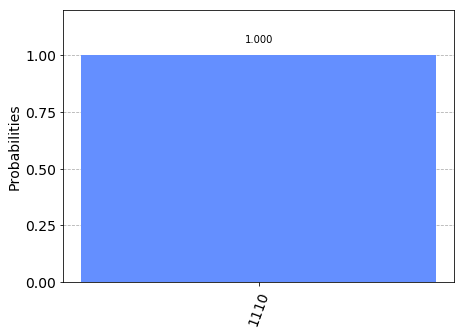

In [5]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(djCircuit, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [6]:
from qiskit import*

In [7]:
IBMQ.save_account('token')#Add your token

In [8]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
IBMQ.load_account()
provider=IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 5 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/qiskit/providers/models/backendconfiguration.py:337: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


least busy backend:  ibmq_vigo


In [9]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(djCircuit, backend=backend, shots=shots)

job_monitor(job, interval = 2)

Job Status: job has successfully run


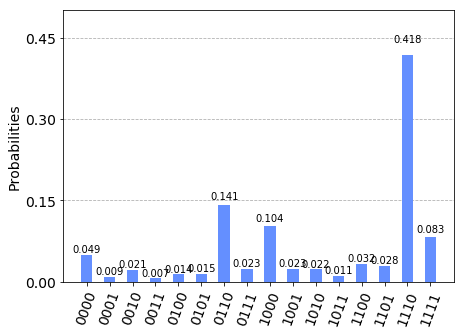

In [10]:
# Get the results of the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)